<font size="5"> 
Disclaimer:
</font> 


These plots were coded to support the introductory part of a presentation on simulating Kolmogorov differential equations using stochastic processes and deep learning. They were developed as part of the applied mathematics course at the University of Vienna in 2024. Available for the interested audience.

<font size="5"> 
Simulating the heat equation using stochastic processes
</font> 

Consider a initial value problem given by the heat equation:

$$ \frac{\partial u}{\partial t} - \alpha \frac{\partial^2 u}{\partial x ^2} =  0$$

With domain in the real line $x \in \mathbb{R}$ and initial conditions given by: $u_0(x) = \mathbb{1}_{(-\frac{1}{2}, \frac{1}{2})}(x)$. 

The analytical solution is given by: 
$$u(x, t) = \frac{1}{2} \left[ \text{erf} \left( \frac{x + \frac{1}{2}}{\sqrt{4t}} \right) - \text{erf} \left( \frac{x - \frac{1}{2}}{\sqrt{4t}} \right) \right],$$

The solution $u(x,t)$ can be approximated by $n \in \mathbb{R}$ using the heat kernel formula: 
$$	u(x, t) = \frac{1}{\sqrt{4 \pi \alpha t}}\int_{-\infty}^\infty  e^{-\frac{(x-y)^2}{4\alpha t}} u_0(y) \ dy   \approx \frac{1}{n} \sum_{i = -\infty}^{\infty} u_0(x_i) \, \frac{1}{\sqrt{4\pi \alpha t}} e^{-\frac{(x - x_i)^2}{4 \alpha t}} $$

Where the points $x_i$ are located in an equidistant length of value $1/n$ in the domain. 

<font size="2"> 

The theory behind this is inspired from the book:

$\textit{Primer Curso de Ecuaciones en Derivadas Parciales}, \ Ireneo Peral Alonso, \ Addison-Wesley.$

</font> 

In [3]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from scipy.special import erf
params = {'legend.fontsize': 15,
          'legend.loc':'best',
          'figure.figsize': (14,5),
          'lines.markerfacecolor':'none',
         'axes.labelsize': 17,
         'axes.titlesize': 17,
         'xtick.labelsize':15,
         'ytick.labelsize':15,
         'grid.alpha':0.6}
pylab.rcParams.update(params)

<font size="5"> 
FIRST IMAGE: 
</font> 

Evolution considering a delta function as initial condition: $u_0(x) = \delta(x)$

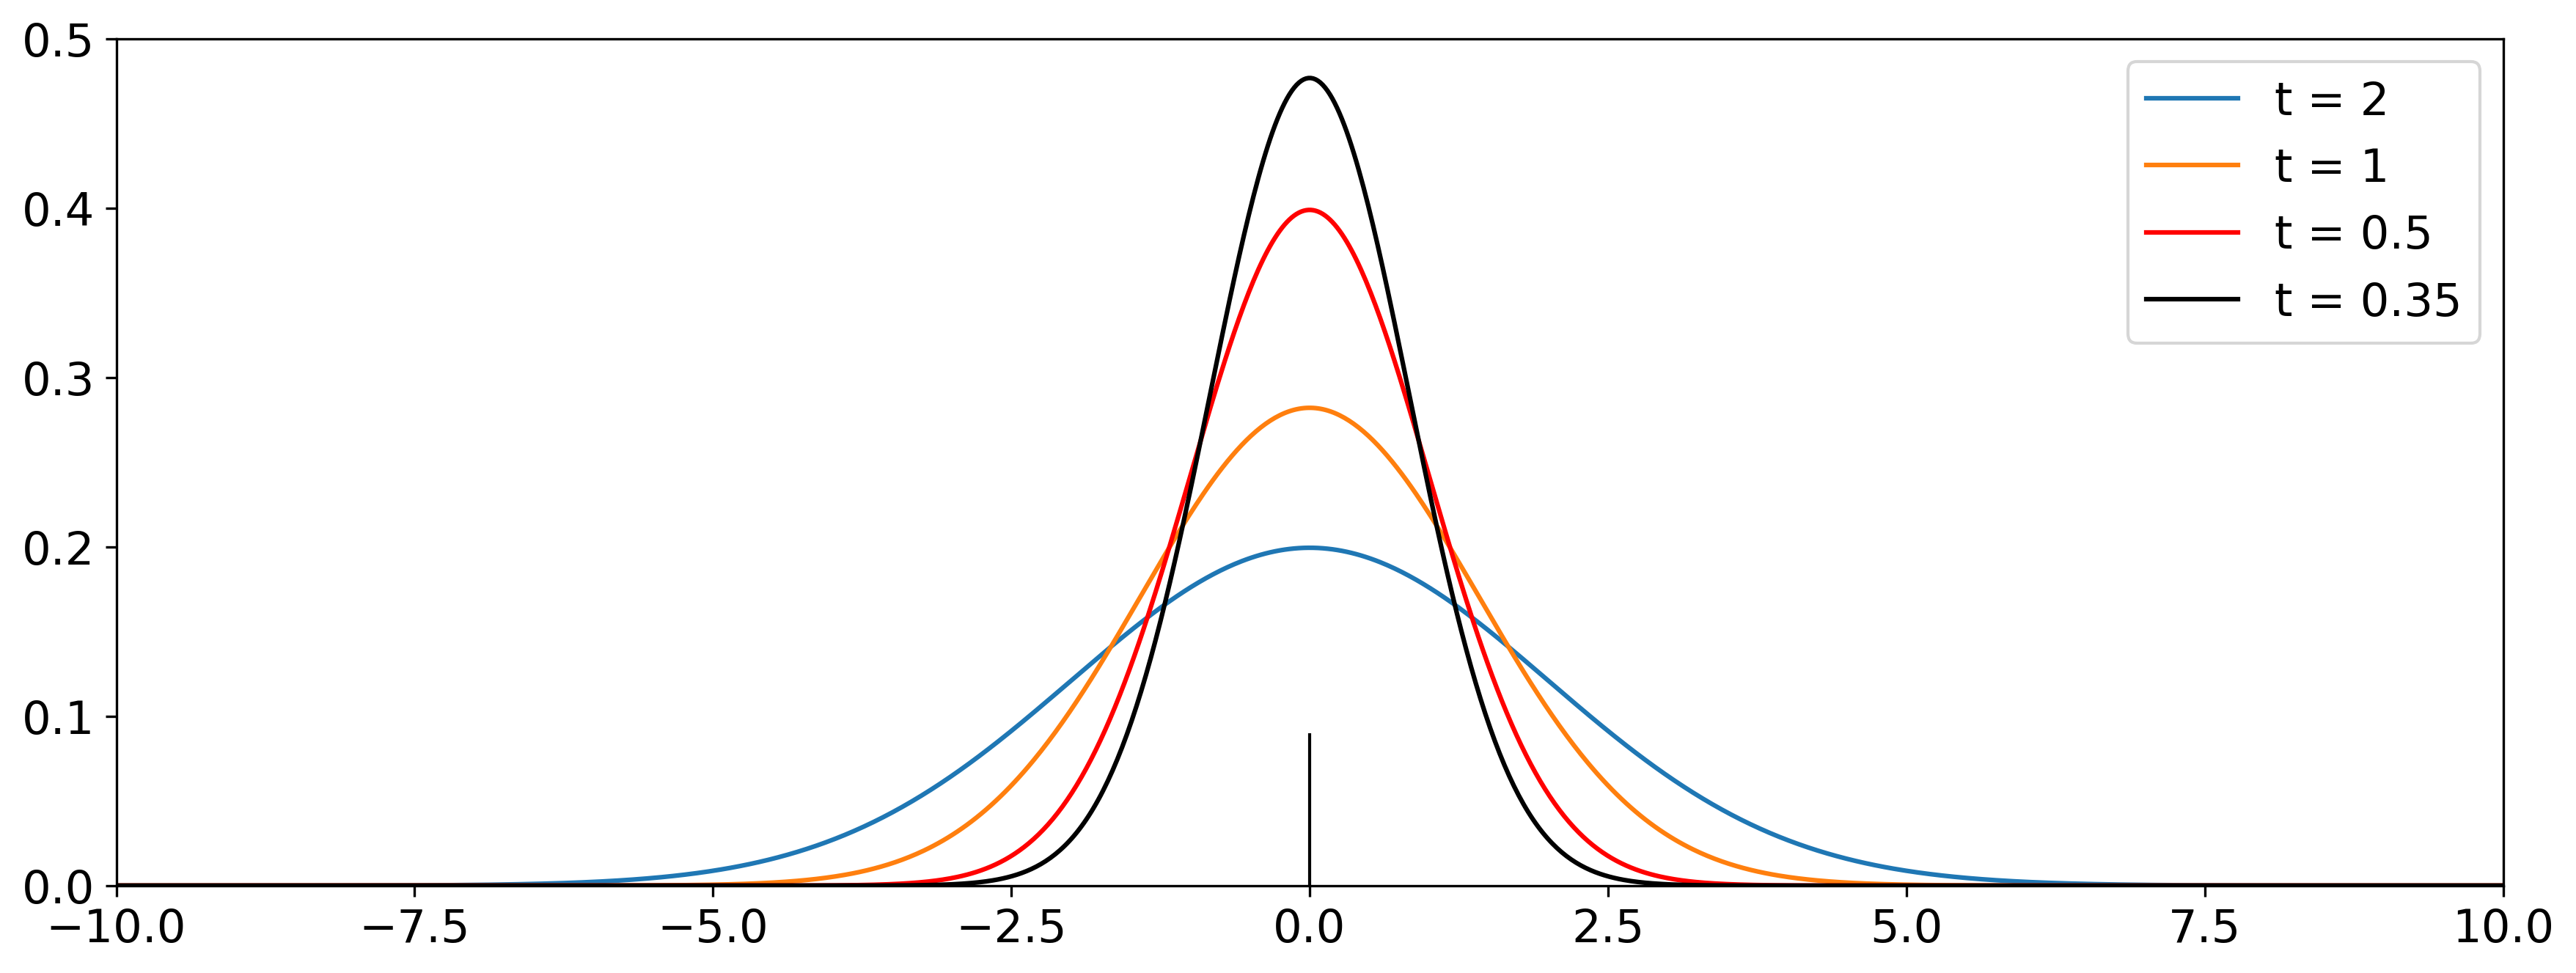

In [4]:
x_values = np.linspace(-10, 10,1000)

def spread(x, mu,t):
    return 1/np.sqrt(4*np.pi*t) * np.exp(-(x-mu)**2 / (4 * t))


y_values_1 = spread(x = x_values, mu = 0, t = 2)
y_values_2 = spread(x = x_values, mu = 0, t = 1)
y_values_3 = spread(x = x_values, mu = 0, t = 0.5)
y_values_4 = spread(x = x_values, mu = 0, t = 0.35)

plt.figure(dpi = 300)
plt.plot(x_values, y_values_1, label = "t = 2")
plt.plot(x_values, y_values_2, label = "t = 1")
plt.plot(x_values, y_values_3, label = "t = 0.5", color = "red")
plt.plot(x_values, y_values_4, label = "t = 0.35", color = "black")
plt.plot(0, 0, marker = '|', color = "black", markersize = 100)
plt.ylim(0,0.5)
plt.xlim(-10,10)
plt.legend()


<font size="5"> 
SECOND IMAGE: 
</font> 

Evolution for 5 different point sources located at different positions: 

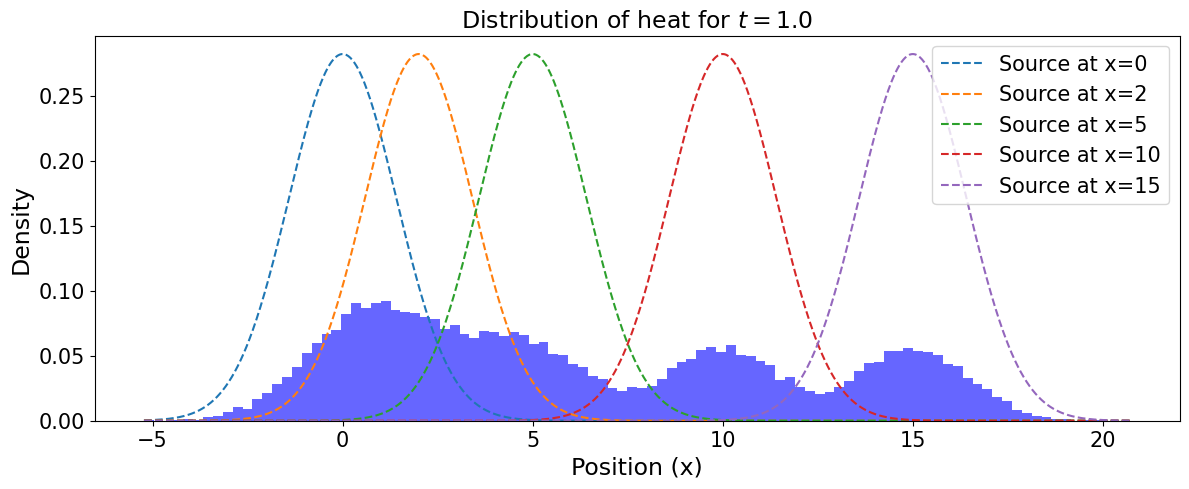

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 1.0  # Diffusion coefficiens
t = 1.0  # Time
N = 5000  # Number of particles
num_sources = 5  # Number of initial sources
x_n = np.array([0, 2, 5, 10, 15])  # Positions of point sources
c_n = np.ones(num_sources)  # Strength for each source

# Simulation: Perform random walk for each source
x_all = []

# Simulate Brownian motion for each particle at each source
for i in range(num_sources):
    x_start = x_n[i]
    x_particle = np.random.normal(loc=x_start, scale=np.sqrt(2 * alpha * t), size=N)
    x_all.append(x_particle)

x_all = np.concatenate(x_all)
plt.hist(x_all, bins=100, density=True, alpha=0.6, color='b')

x_vals = np.linspace(min(x_all), max(x_all), 1000)
for i in range(num_sources):
    normal_dist = (1 / np.sqrt(4 * np.pi * alpha * t)) * np.exp(- (x_vals - x_n[i])**2 / (4 * alpha * t))
    plt.plot(x_vals, normal_dist, label=f'Source at x={x_n[i]}', linestyle='dashed')

plt.title(f'Distribution of heat for $t = {t}$')
plt.xlabel('Position (x)')
plt.ylabel('Density')
plt.legend(loc='best')

plt.show()

<font size="5"> 
THIRD IMAGE:
</font> 

Simulation of the heat equation as a sum of many points sources for an initial condition given by a box function. 

Area at time t = 0.001: 1.0000000000000007
Area at time t = 0.05: 1.0000000000000007
Area at time t = 0.2: 1.0000000000000007


/tmp/ipykernel_3265/296494477.py:13: RuntimeWarning: divide by zero encountered in divide
  return 0.5 * (erf((x + 0.5) / (2 * np.sqrt(t))) - erf((x - 0.5) / (2 * np.sqrt(t))))


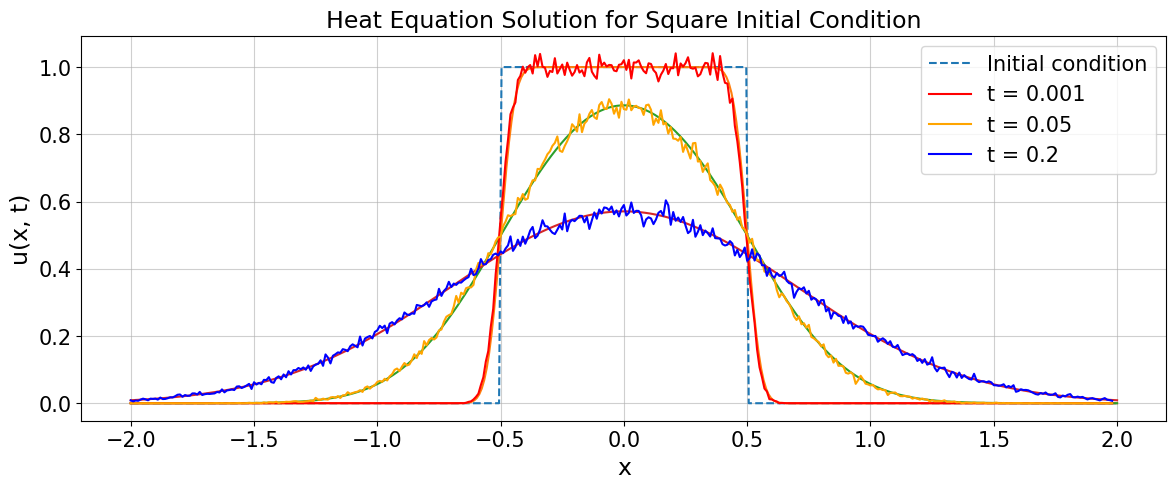

In [6]:
#Parameters: 
L = 2 #Spatial domain 
Partition = 1000
N = 10**3  # Total number of samples per time step.
alpha = 1  # Diffusion coefficient. 
t_values = [0.001, 0.05, 0.2]  # Times to plot
S = 0.01
bin_edges = np.arange(-L, L, S)  # Bin edges for histogram


# Analytical solution:
def u(x, t):
    return 0.5 * (erf((x + 0.5) / (2 * np.sqrt(t))) - erf((x - 0.5) / (2 * np.sqrt(t))))


#Approximated solution:
x_values = np.linspace(-L, L, Partition)
counts_history_total = []

for t in t_values:
    counts_history = np.zeros(len(bin_edges)-1) 
    Area = 0  

    for x in x_values: 
        if np.abs(x) <= 0.5:
            Area += 2 * L / Partition
            samples = np.random.normal(loc=x, scale=np.sqrt(2 * alpha * t), size=N)
            counts, _ = np.histogram(samples, bins=bin_edges)
            counts_history += 2*L/Partition * counts/N * 1/S

    counts_history_total.append(counts_history)
    print(f"Area at time t = {t}: {Area}") #Check

#Plot: 

#Analytical solution:
x = np.linspace(-L, L, 400)
plt.title('Heat Equation Solution for Square Initial Condition')
plt.plot(x, u(x, 0), linestyle = 'dashed', label = 'Initial condition')
for t in t_values:
    plt.plot(x, u(x, t), label = '')

#Simulated solution:
plt.plot(bin_edges[:-1], counts_history_total[0], color = "red", label=f't = {0.001}') 
plt.plot(bin_edges[:-1], counts_history_total[1], color = "orange", label=f't = {0.05}')  
plt.plot(bin_edges[:-1], counts_history_total[2], color = "blue", label=f't = {0.2}')  
plt.xlabel('x')
plt.ylabel('u(x, t)')
plt.legend()
plt.grid(True)
plt.show()
